A Time Series is a special kind of data, typified by an inherent dependence grounded on events realized throughout time. It is usual to find this trait data on some business problems, such as offer and demand forecasting, risk modeling, and churn, amongst many others. At this moment, this essay strings together the key concepts regarding TS, detailed properly, for a broad introduction. Deep details shall be found in the primary references.   

-----
### 1.1 TS Definition
    
`Continuous-time series` are continuous observations throughout some interval T = [0,1], whereas `Discrete-time series` have a fixed time intervals. The later one is the regular case.   
   

A open time-series for exploration: https://www.kaggle.com/datasets/arashnic/time-series-forecasting-with-yahoo-stock-price     
Data Description: Stocks and financial instrument trading is a lucrative proposition. Stock markets across the world facilitate such trades and thus wealth exchanges hands. Stock prices move up and down all the time and having ability to predict its movement has immense potential to make one rich.   

In [27]:
from IPython.display import display, Latex

import pandas as pd
import matplotlib.pyplot as plt

timeseries = pd.read_csv("DailyDelhiClimateData/DailyDelhiClimateTrain.csv", sep=',')
timeseries['date'] = pd.to_datetime(timeseries['date'])
timeseries = timeseries.set_index('date')

TARGET_COLUMN = 'meantemp' # Mean temp
#timeseries = timeseries[timeseries.index>='2014-01-01']

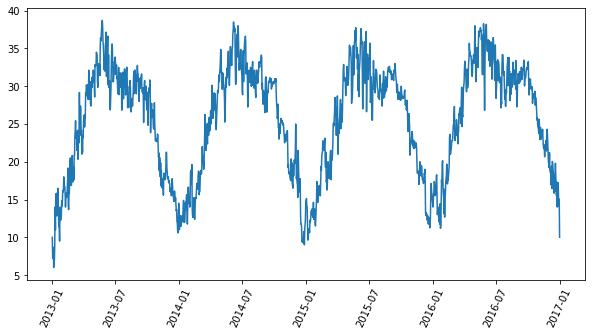

In [28]:
# Beholding data.
plt.figure(figsize=(10,5))
plt.plot(timeseries[TARGET_COLUMN])
_ = plt.xticks(rotation=65)

----
### 1.2 Stochastic Process

It is plain to grasp the advantages of modelling a TimeSeries as stochastic process. Each observation is a realization of a certain random variable X_t, which can describe the unpredictability of future events. 


```
A stochastic process is a family of random variables {X_t, T}. "Time Series: Theory and Methods. Second Edition. Peter J. Brockwell; Richard A. Davis."
```

##### 1.2.1 Kolmogorov's Theorem

The Kolmogorov extension theorem lays the foundation for the consistence of a stochastic process. It is hard to explain without a cumbersome notation, however Fabrice Baudoin did a remarkable job: https://fabricebaudoin.wordpress.com/2012/03/25/lecture-5-the-daniell-kolmogorov-existence-theorem/. The theorem describes the distribution functions of a stochastic process as a joint probability density function, its convergence, and the marginal distributions matching with distribution functions on a low level.



-----
### 1.3 Stationarity

Perhaps one of the foremost concepts of timeseries is the `Autocovariance Function`, a way to gain insight into the dependence. The formula for autocovariance function:  


$$\gamma(y, s) = Cov(X_r, X_s) = E[(X_r - E X_r)(X_s - E X_s)]$$

Having the Autocovariance function, we are set up to define stationarity by three mathematical axioms:

$$ (i) E|X_t|² < \infty$$
$$ (ii) EX_t = m$$
$$ (iii)   \gamma(y, s) = \gamma(y + t, s + t)$$

To translate the axioms to a vernacular language, the three axioms may be read as is follows:   

1. The mean of every random variable shouldn't be infinite.   
2. The mean is constant throughout all random variables of the timeseries.    
3. The autocovariance function is constant throughout all random variables of the timeseries.    

Stationarity may receive names weak stationarity, covariance stationarity or second-order stationarity.

-----
### 1.4 TimeSeries Decomposition

A TimeSeries may be decomposed as a `classical decomposition model`, as long as the data represents the realization of a process. The three components of a TimeSeries:

(i) m_t = The trend component.   
(ii) s_t = The seasonal component.    
(iii) Y_t =  The random noise component.   
    
Components (i) is suggestive. The (ii) is characterized by a strong serial correlation at specific displacement (and possibly multiples thereof). The (iii) is stationary and near-impredictable. A canonical task is the decomposition of a TimeSeries onto these three components. As it follows, a compreheensive list with some techniques to achieve that decomposition.  

#### 1.4.1 In the absence of Seasonality   

The TimeSeries is decomposed in two components:

$$X_t = m_t + Y_t$$

We aim to estimate the trend component.    

```
Method 1. Least Squares Estimation of m_t.

The m_t is found by the classical adjustment of a parametric function. For a 2-degree function, the function goes as it follows:
```

$$m_t = b_0 + b_1t + b_2t²$$


```
Method 2. Smoothing by Means of a Moving Average.

As the name suggests, the trend is calculates the means of specific window Moving Average.   


```


```
Method 3. Differencing to Generate Stationary Data.    

This strategy eliminates the trend by differencing the TimeSeries, through gradient cleaning.   

``` 

#### 1.4.2 Finding both Trend and Seasonality     

Both seasonality and trend cleaning can leverage the aforementioned methods.   

$$X_t = m_t + s_t + Y_t$$


```
Method 1. The Small Trend Method.   

It may be reasonable to define the trend term as constant. Furthermore, the sum of seasonality component is zero. The m_t component is calculated:   

```
$$m_t = 1/12 \sum_{n=1}^{12}x_{j,k} $$

```
Then the s_k as:

``` 

$$s_t = 1/6 \sum_{n=1}^{6}(x_{j,k} - m_j)$$


```
Method 2. Moving Average Estimation.

The estimation of two steps leverages the moving average to extract the trend and deviation average for the seasonal component.
```

The library statsmodels has an incredible API for the Trend+Seasonal+Random decomposition, which applies moving averages.

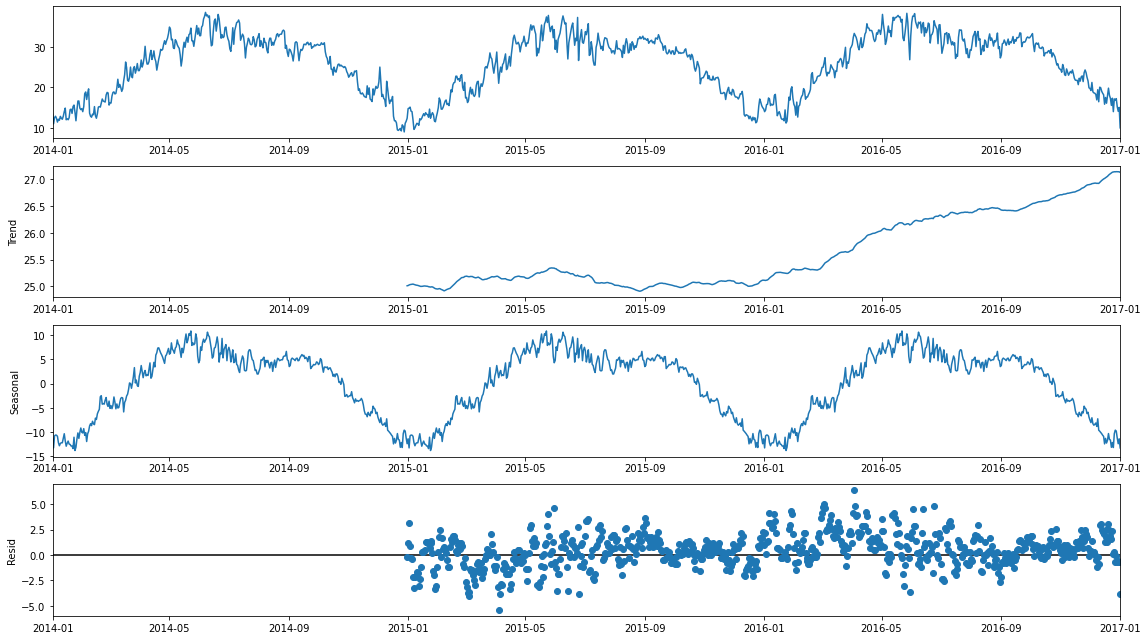

In [26]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition_viz = seasonal_decompose(timeseries[[TARGET_COLUMN]], period=365, two_sided=False)
fig = decomposition_viz.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()
plt.show()

Generally, the random noise is stationary.